In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn import feature_selection as feature
from sklearn import preprocessing as pre
from sklearn import model_selection as model

from scipy.stats import spearmanr

In [ ]:
df = pd.read_csv('sample_data/bank.csv', ";")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [ ]:
df.info()

# => đủ dòng không null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [ ]:
# select những cột category
category_col = df.select_dtypes(include=[object])

In [ ]:
df.describe()
# trong cột balance có âm

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [ ]:
df["balance"].isna()
# => có nan trong cột này => drop nan
df = df.dropna()

In [ ]:
# drop balance âm
df["balance"] = df[df["balance"] >= 0]

In [ ]:
# check dữ liệu category
print(category_col)
for col in category_col:
    print("UNIQUE OF " + col + ": ");
    temp_arr = df[col].unique()
    print(temp_arr)

# => tất cả các cột category đều chứa dữ liệu dúng với business và không có missing value (trên info)

                job  marital  education default  ...   contact month poutcome   y
0        unemployed  married    primary      no  ...  cellular   oct  unknown  no
1          services  married  secondary      no  ...  cellular   may  failure  no
2        management   single   tertiary      no  ...  cellular   apr  failure  no
3        management  married   tertiary      no  ...   unknown   jun  unknown  no
4       blue-collar  married  secondary      no  ...   unknown   may  unknown  no
...             ...      ...        ...     ...  ...       ...   ...      ...  ..
4516       services  married  secondary      no  ...  cellular   jul  unknown  no
4517  self-employed  married   tertiary     yes  ...   unknown   may  unknown  no
4518     technician  married  secondary      no  ...  cellular   aug  unknown  no
4519    blue-collar  married  secondary      no  ...  cellular   feb    other  no
4520   entrepreneur   single   tertiary      no  ...  cellular   apr    other  no

[4521 rows x 10

In [ ]:
# qua check các cột đều có data khác nhau (không chứa 1 giá trị duy nhất), các cột có đủ giá trị => không drop cột nào

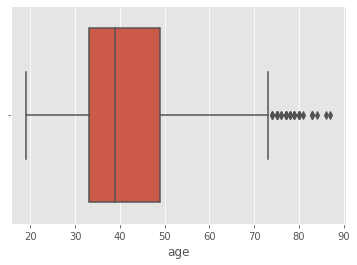

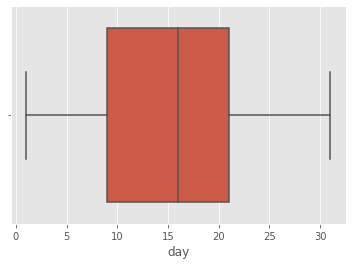

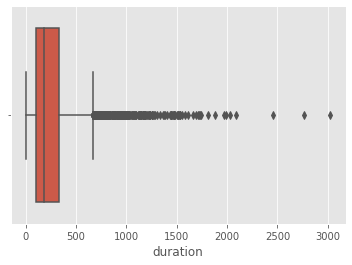

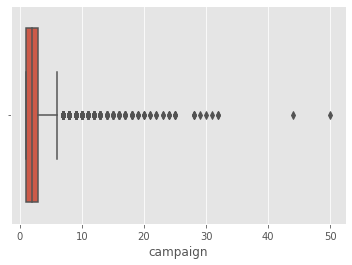

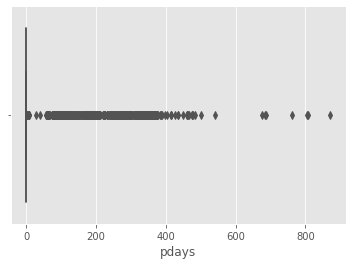

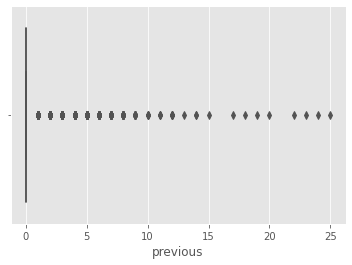

In [ ]:
# draw box plot
for i, col in enumerate(df.describe().columns):
    plt.figure(i)
    sns.boxplot(x = df[col])

In [ ]:
# như trên có 2 cột previous và pdays có rất nhiều outliners => drop những cột này
# có thể đa số khách hàng trong tập này không được contact bởi đợt campaign trước nên sẽ drop 
# => sẽ clean outliner cột duration, campaign, age

In [ ]:
df = df.drop(['pdays', 'previous'], axis=1)
df["duration"] = df[df["duration"] < 800]
df["campaign"] = df[df["campaign"] < 9]
df["age"] = df[df["age"] < 75]
df = df.dropna()

In [ ]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,poutcome,y
0,30,unemployed,married,primary,no,30,no,no,cellular,19,oct,30,30,unknown,no
1,33,services,married,secondary,no,33,yes,yes,cellular,11,may,33,33,failure,no
2,35,management,single,tertiary,no,35,yes,no,cellular,16,apr,35,35,failure,no
3,30,management,married,tertiary,no,30,yes,yes,unknown,3,jun,30,30,unknown,no
4,59,blue-collar,married,secondary,no,59,yes,no,unknown,5,may,59,59,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4513,49,blue-collar,married,secondary,no,49,no,no,cellular,14,aug,49,49,unknown,no
4514,38,blue-collar,married,secondary,no,38,yes,no,cellular,20,apr,38,38,failure,no
4515,32,services,single,secondary,no,32,yes,no,cellular,7,jul,32,32,unknown,no
4519,28,blue-collar,married,secondary,no,28,no,no,cellular,6,feb,28,28,other,no


In [ ]:
 from sklearn import preprocessing as pre

In [ ]:
#Gán nhãn cho dữ liệu
enc = pre.LabelEncoder()

for col in category_col:
    df[col] = enc.fit_transform(df[col])

df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,poutcome,y
0,30,10,1,0,0,30,0,0,0,19,10,30,30,3,0
1,33,7,1,1,0,33,1,1,0,11,8,33,33,0,0
2,35,4,2,2,0,35,1,0,0,16,0,35,35,0,0
3,30,4,1,2,0,30,1,1,2,3,6,30,30,3,0
4,59,1,1,1,0,59,1,0,2,5,8,59,59,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4513,49,1,1,1,0,49,0,0,0,14,1,49,49,3,0
4514,38,1,1,1,0,38,1,0,0,20,0,38,38,0,0
4515,32,7,2,1,0,32,1,0,0,7,5,32,32,3,0
4519,28,1,1,1,0,28,0,0,0,6,3,28,28,1,0


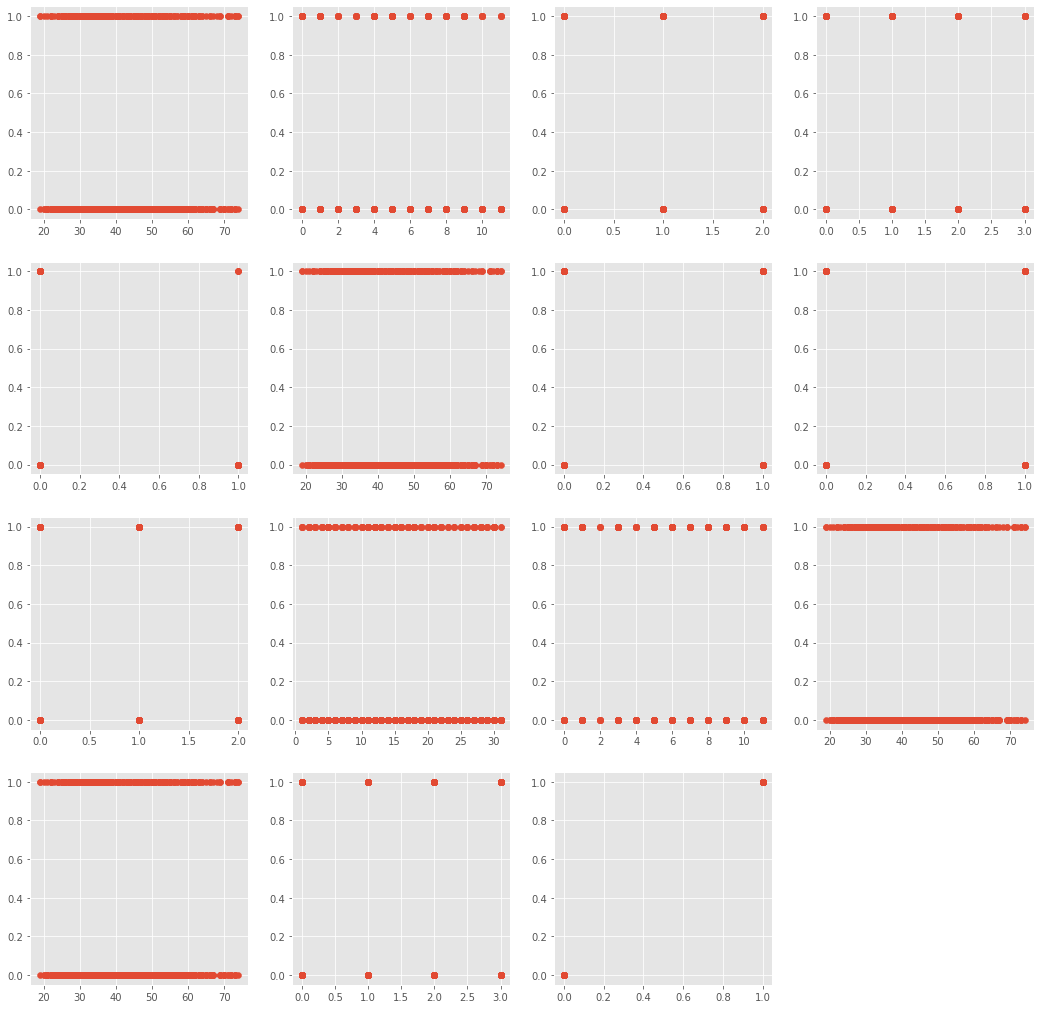

In [ ]:
plt.style.use('ggplot')
fig=plt.figure(figsize=(18,18))
for index, feature_name in enumerate(df.columns):
  ax=fig.add_subplot(4,4,index+1)
  ax.scatter(df[feature_name],df['y'])

# **Heatmap:**

In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,job,marital,education,default,housing,loan,contact,day,month,poutcome,y
job,1.000000,0.077528,0.171339,0.009576,-0.132820,-0.041152,-0.074410,0.008656,-0.080239,0.016026,0.033798
marital,0.077528,1.000000,0.104581,-0.009553,-0.043217,-0.050011,-0.082209,0.021472,-0.040222,-0.031236,0.025850
education,0.171339,0.104581,1.000000,-0.011426,-0.099501,-0.049010,-0.103999,0.003503,-0.044000,-0.027466,0.059213
default,0.009576,-0.009553,-0.011426,1.000000,-0.016031,0.045188,-0.003896,-0.005259,0.007741,0.031051,0.008224
housing,-0.132820,-0.043217,-0.099501,-0.016031,1.000000,0.022218,0.192030,-0.037641,0.256617,-0.094996,-0.120569
loan,-0.041152,-0.050011,-0.049010,0.045188,0.022218,1.000000,-0.001237,-0.009718,0.015985,0.021410,-0.088586
contact,-0.074410,-0.082209,-0.103999,-0.003896,0.192030,-0.001237,1.000000,-0.014845,0.353211,0.270975,-0.143912
day,0.008656,0.021472,0.003503,-0.005259,-0.037641,-0.009718,-0.014845,1.000000,0.001406,0.064285,-0.016275
month,-0.080239,-0.040222,-0.044000,0.007741,0.256617,0.015985,0.353211,0.001406,1.000000,-0.026771,-0.041571
poutcome,0.016026,-0.031236,-0.027466,0.031051,-0.094996,0.021410,0.270975,0.064285,-0.026771,1.000000,-0.092641



không thấy sự tương quan giữa các thuộc tính trong bộ dữ liệu.


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()

In [ ]:
scaler.fit(df.drop('y',axis=1))

StandardScaler()

In [ ]:
scaled_features = scaler.transform(df.drop('y', axis = 1))

In [ ]:
scaled_data = pd.DataFrame(scaled_features, columns = df.drop('y', axis = 1).columns)

In [ ]:
scaled_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,poutcome
0,-1.079714,1.700313,-0.261153,-1.657894,-0.092438,-1.079714,-1.116636,-0.406671,-0.705825,0.409661,1.459353,-1.079714,-1.079714,0.459147
1,-0.784593,0.782435,-0.261153,-0.330946,-0.092438,-0.784593,0.895547,2.458992,-0.705825,-0.569326,0.802344,-0.784593,-0.784593,-2.498552
2,-0.587846,-0.135442,1.422083,0.996001,-0.092438,-0.587846,0.895547,-0.406671,-0.705825,0.042541,-1.825691,-0.587846,-0.587846,-2.498552
3,-1.079714,-0.135442,-0.261153,0.996001,-0.092438,-1.079714,0.895547,2.458992,1.529731,-1.548312,0.145335,-1.079714,-1.079714,0.459147
4,1.773122,-1.053319,-0.261153,-0.330946,-0.092438,1.773122,0.895547,-0.406671,1.529731,-1.303566,0.802344,1.773122,1.773122,0.459147


# **Chia dữ liệu train và test:**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x=scaled_data
y=df['y']

In [ ]:
# phân loại các bộ dữ liệu train test 

x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x, y, test_size = 0.3)

# **Sử dụng K-NN Classifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model= KNeighborsClassifier(n_neighbors=3)
model.fit(x_training_data,y_training_data)
predictions=model.predict(x_test_data)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
print(confusion_matrix(y_test_data, predictions))
#True Positive: 1000
#False Positive: 25
#False negative: 100
#True Negative: 9

[[1000   25]
 [ 100    9]]


In [ ]:
print(classification_report(y_test_data, predictions))


              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1025
           1       0.26      0.08      0.13       109

    accuracy                           0.89      1134
   macro avg       0.59      0.53      0.53      1134
weighted avg       0.85      0.89      0.86      1134



Độ chính xác của model: 89%